# Car Price Prediction

The following data set contains information about the different prices and specifications of cars recorded in the US. The features provided are as follows: 

- ID
- Price: price of the care(Target Column)
- Levy
- Manufacturer
- Model
- Prod. year
- Category
- Leather interior
- Fuel type
- Engine volume
- Mileage
- Cylinders
- Gear box type
- Drive wheels
- Doors
- Wheel
- Color
- Airbags

https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge

In [1]:
# pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

pd.set_option('max_columns', None)

import warnings
warnings.filterwarnings("ignore")

In [2]:
original = pd.read_csv("C:/Users/nikau/OneDrive/Desktop/IOD/Capstone Project/car_price_prediction.csv")

In [3]:
original

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [5]:
original.shape

(19237, 18)

we can see that there are 19237 rows x 18 columns present in this data set

In [6]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

- There are 4 columns with int64 data type
- There are 13 columns with object data type
- There is 1 column with float64 data type

In [7]:
original.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,19237.0,4.557654e+07,936591.422799,20746880.0,45698374.0,45772308.0,45802036.0,45816654.0
Price,19237.0,1.855593e+04,190581.269684,1.0,5331.0,13172.0,22075.0,26307500.0
Prod. year,19237.0,2.010913e+03,5.668673,1939.0,2009.0,2012.0,2015.0,2020.0
Cylinders,19237.0,4.582991e+00,1.199933,1.0,4.0,4.0,4.0,16.0
Airbags,19237.0,6.582627e+00,4.320168,0.0,4.0,6.0,12.0,16.0


<AxesSubplot:>

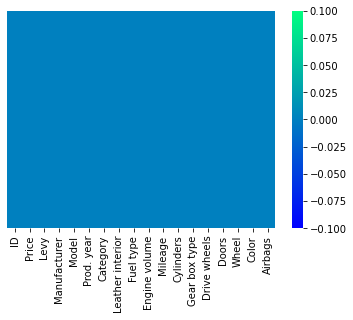

In [8]:
sns.heatmap(original.isnull(), yticklabels=False, cmap='winter')

There are no missing values present, the data is ready for data cleaning and  preprocessing

# Data Cleaning

In [9]:
# creating a copy of the original dataset

df = original.copy()

In [10]:
# checking for any duplications

print(f'duplicated rows = {df.duplicated().sum()} ')

duplicated rows = 313 


In [11]:
df.loc[original.duplicated()]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
425,45815372,7840,-,MERCEDES-BENZ,E 200,1998,Sedan,No,CNG,2,180003 km,4.0,Manual,Rear,04-May,Left wheel,Black,4
1581,45815363,8781,-,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
1697,45732125,18503,-,TOYOTA,Prius,2010,Sedan,No,Petrol,1.8,162000 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
1972,45507765,20385,-,MERCEDES-BENZ,CLS 500,2005,Sedan,Yes,Petrol,5,230000 km,8.0,Tiptronic,Rear,04-May,Left wheel,Silver,10
2131,45815363,8781,-,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,45815465,2352,1273,LEXUS,IS 350,2015,Sedan,Yes,Petrol,3.5,80856 km,6.0,Automatic,4x4,04-May,Left wheel,Black,12
19137,45810466,15125,642,CHEVROLET,Orlando,2012,Jeep,Yes,Diesel,2,156834 km,4.0,Automatic,Front,04-May,Left wheel,Golden,4
19200,45725908,36065,640,MERCEDES-BENZ,CLA 250 AMG,2013,Sedan,Yes,Petrol,2.0 Turbo,68000 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,12
19203,45761487,13485,645,TOYOTA,Prius,2011,Sedan,No,Hybrid,1.8,281600 km,6.0,Automatic,Front,04-May,Left wheel,Grey,8


In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(18924, 18)

There are 313 duplicated rows present in the data. These duplications are not required and can be removed to only keep the true values.

there are now 18924 columsn x 18 rows now that the duplications are removed.

### Feature Engineering

In [14]:
df['Car Model'] = df['Manufacturer']+' '+ df['Model']

I have combined the 'Manufacturer' and 'Model' columns together and created a new column called the 'Car Model. I have decided to merge to columns together so to reduce the amount of columns in the data set by one. This also puts the vehicle entire name into a single column rather than split in two, having less columns will increase the performance on the machine learning model.

In [15]:
df['Turbo'] = df['Engine volume'].str.contains('turbo')

Finding the rows which has turbo in them and assigning the results to new column Turbo

In [16]:
df['Age'] = 2022 - df['Prod. year']

In [17]:
df = df.drop(['ID', 'Manufacturer','Model'],axis = 1)

Removing the 'ID', 'Manufacturer' abd 'Model' now because they are not needed. ID does not provide any information

In [18]:
df.head()

,Price,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Car Model,Turbo,Age
0,13328,1399,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,LEXUS RX 450,False,12
1,16621,1018,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,CHEVROLET Equinox,False,11
2,8467,-,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,HONDA FIT,False,16
3,3607,862,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,FORD Escape,False,11
4,11726,446,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,HONDA FIT,False,8


In [19]:
# checking for wrong entries such as special symbols e.g -,?,*,#,$ etc.


for col in df.columns:
    print('{} : {}'.format(col, df[col].unique()))

Price : [13328 16621  8467 ... 56814 63886 22075]
Levy : ['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'
 '798' '1277' '442' '1051' '790' '1292' '1047' '528' '1211' '1493' '1793'
 '574' '930' '1998' '271' '706' '1481' '1677' '1661' '1286' '1408' '1090'
 '595' '1451' '1267' '993' '1714' '878' '641' '749' '1511' '603' '353

There are two characters present, one in levy column with '_' and one in the Doors column with '>'

In the 'engine volume' column, some of the values has turbo and some doesn't so we will split and remove the turbo so it will remain the numbers alone

In [20]:
print(f'Data Contains {df.shape[0]} rows , {df.shape[1]} columns')

Data Contains 18924 rows , 18 columns


In [21]:
# mileage I am going replace the 'km' text with blank space leaving it as a number, then changing the data type to an integer

df['Mileage'] = df['Mileage'].apply(lambda x : str(x).replace("km"," "))
df['Mileage'] = df['Mileage'].astype(str).astype(int)

# engine volume replacing the 'Turbo' text and leaving as a blank speace, then changing the data type to integer

df['Engine volume'] = df['Engine volume'].str.replace("Turbo", " ")
df['Engine volume'] = df['Engine volume'].astype(str).astype(float)

# levy replacing the '-' text to leave as blank, then changing the data type to integer

df['Levy'] = df['Levy'].apply(lambda x: str(x).replace("-","0"))
df['Levy'] = df['Levy'].astype(str).astype(int)

# replacing the '-' abd '>' symbols and changing the data type to integer

df['Doors']= df['Doors'].replace({'04-May':4,'02-Mar':2})
df['Doors']=df['Doors'].astype(str)
df['Doors']=df['Doors'].str.split('-').str[0]
df['Doors']=df['Doors'].replace('>5',5)
df['Doors']=df['Doors'].astype(int)


In [22]:
# df['Leather']= df['Leather'].replace({'Yes':1,'No':0})
df['Leather interior']= df['Leather interior'].replace({'Yes':1,'No':0})

In [23]:
# df['Turbo']= df['Turbo'].replace({'True':1,'False':0})
df["Turbo"] = df["Turbo"].astype(int)

In [24]:
# data set after cleaning is done

df.head()

,Price,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Car Model,Turbo,Age
0,13328,1399,2010,Jeep,1,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,LEXUS RX 450,0,12
1,16621,1018,2011,Jeep,0,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,CHEVROLET Equinox,0,11
2,8467,0,2006,Hatchback,0,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,HONDA FIT,0,16
3,3607,862,2011,Jeep,1,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,FORD Escape,0,11
4,11726,446,2014,Hatchback,1,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,HONDA FIT,0,8


<AxesSubplot:>

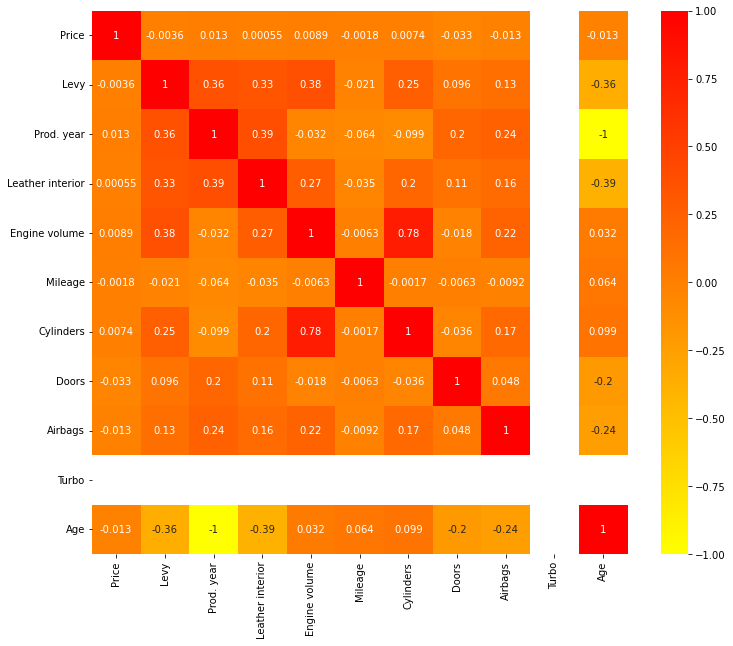

In [25]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='autumn_r')

# Categorical Features

In [26]:
cat_feature=[feature for feature in df.columns if df[feature].dtype=='O']
print(cat_feature)

['Category', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color', 'Car Model']


In [27]:
for feature in cat_feature:
    print(f'{feature} has {len(df[feature].unique())} values')

Category has 11 values
Fuel type has 7 values
Gear box type has 4 values
Drive wheels has 3 values
Wheel has 2 values
Color has 16 values
Car Model has 1601 values


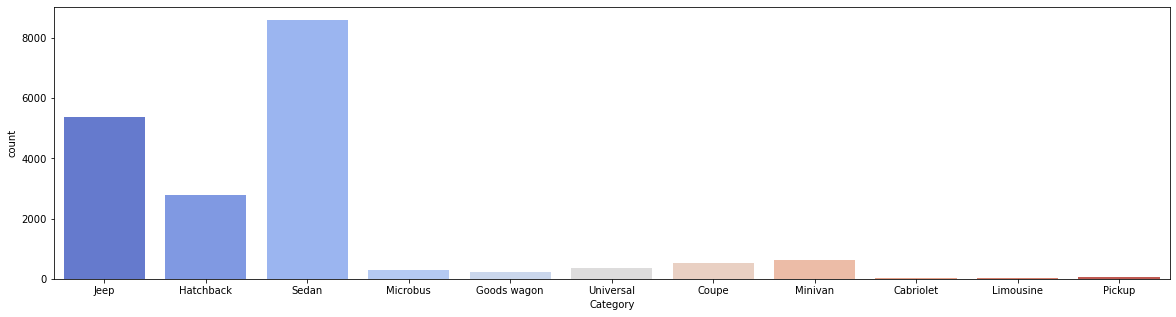

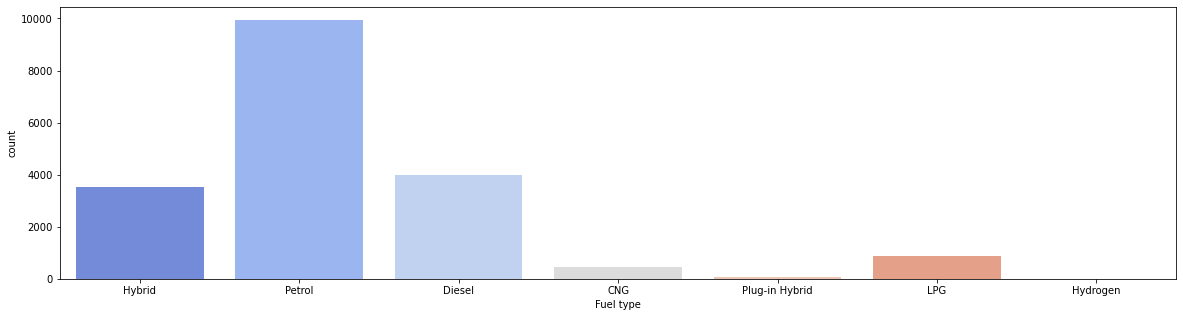

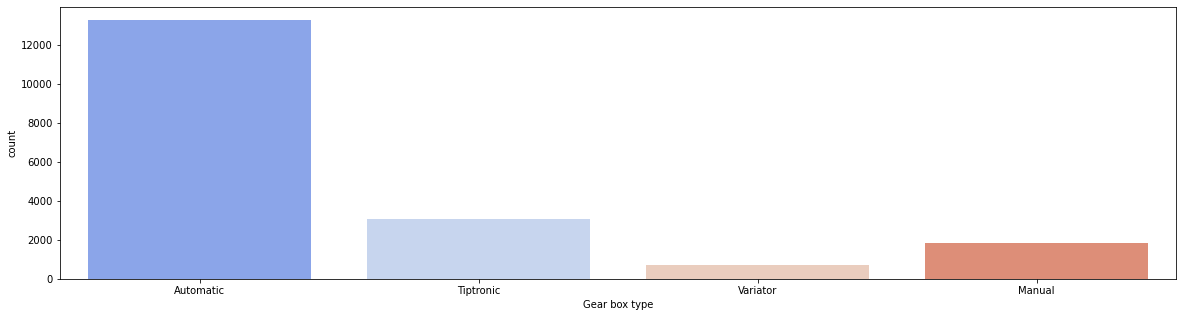

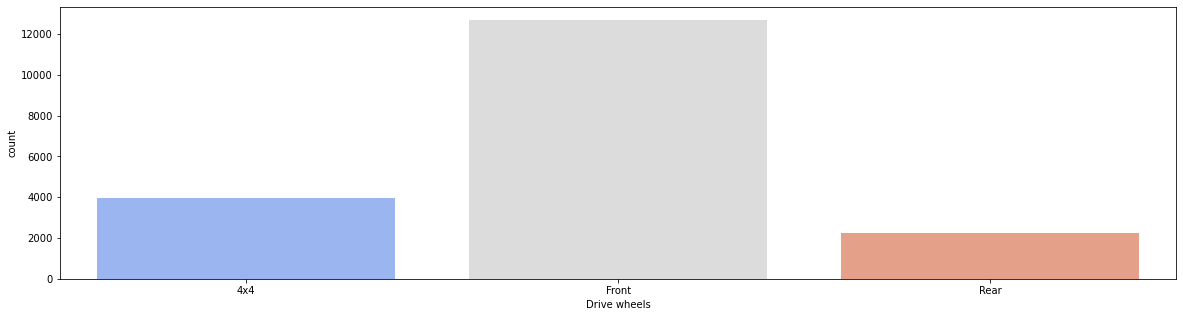

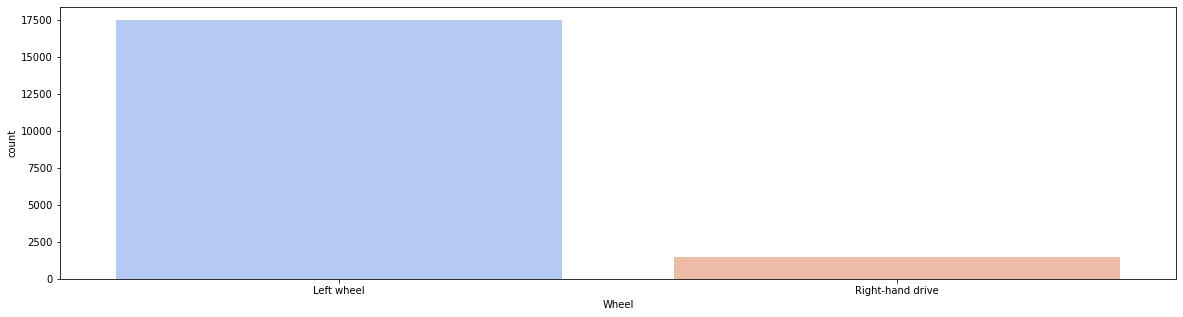

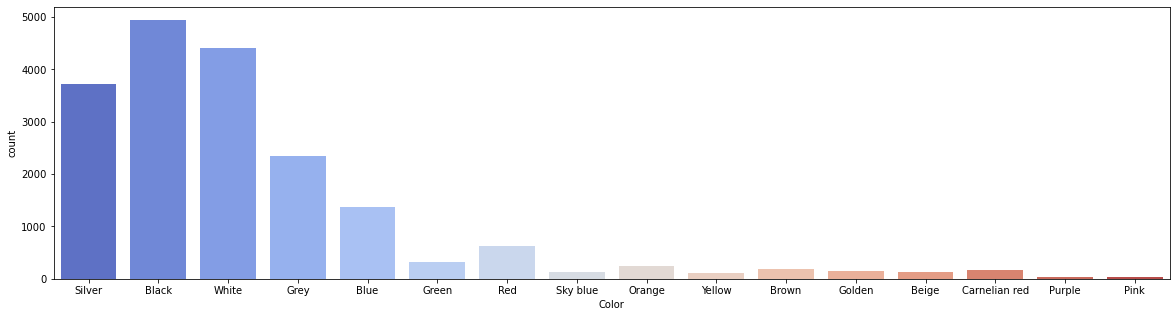

In [28]:
cat_feature1=[feature for feature in cat_feature if len(df[feature].unique())<50]
for feature in cat_feature1 :
    plt.figure(figsize = (20, 5))
    sns.countplot(df[feature],palette="coolwarm")
    plt.show()

In [29]:
'Category', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color'

('Category', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color')

Category: 
   - looking at the category bar graph you can see that the most common vehilce type being used is the Sedan with 8736.The second most common vehicle is Jeep. This makes sense as sedans are more comfortable and appropriate for everyday use by customers.
   
Fuel type:
   - The most commonly used fuel type is petrol(petroleum) as this is widely used by people driving their own private vehicles.Diesel is the second most common type which are mostly used for larger vehicles such as trucks and SUV's.
   
Gear box type:
   - Most of the vehicles produced nowadays are automatic so it is no surprise that most vehicles have an automatic gear box type.

Drive wheels:
   - Front wheel drive is the most common with 12874, 4-wheel-drive is not as popular being that they are only used inside the larget trucks and SUV's, amount being 4058
   
Wheel:
  - Since this dataset is based from cars in the US. It is much more common for their steering wheel to be on the left hand side compared to the right hand side like we do here.
  
Color: 
   - Black is the most common car amongst all the other colors, White, Silver and Grey are second,third and fourth respectively. People tend to lean more towards buying are dull colored car rather than a vibrant color car.

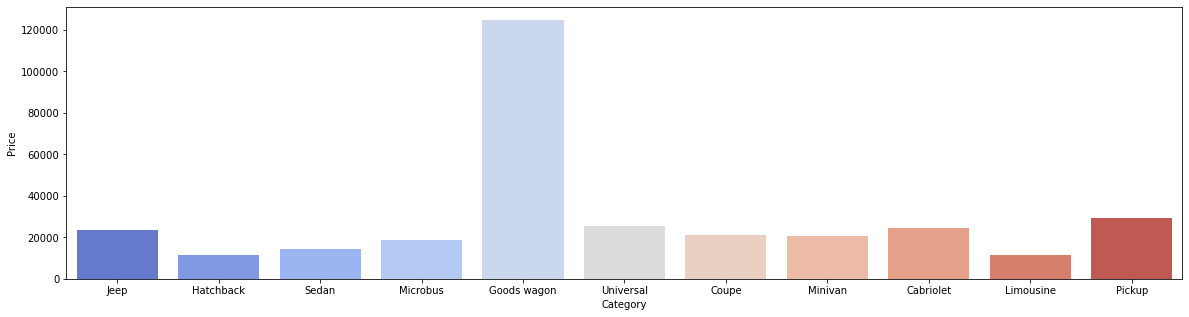

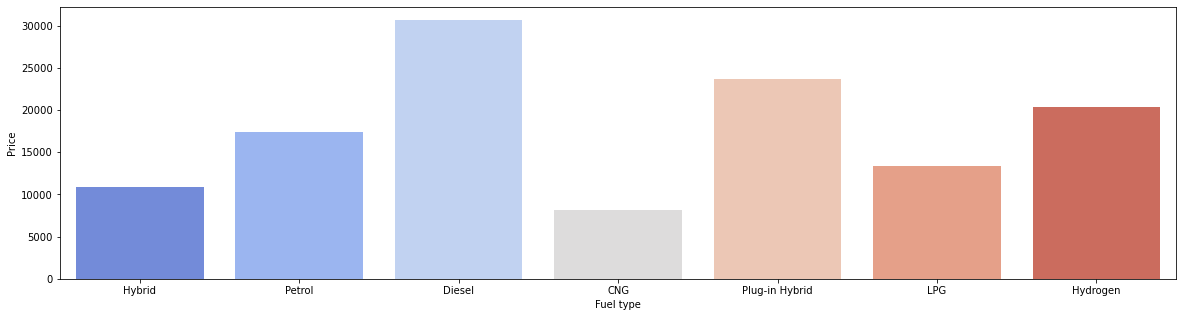

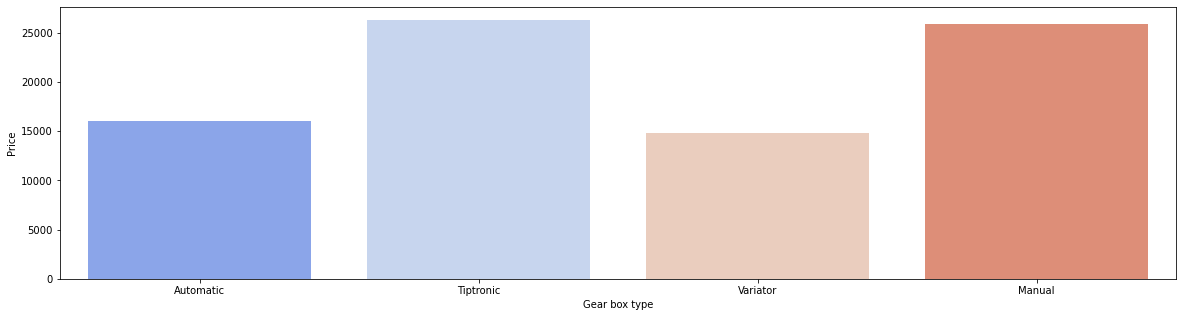

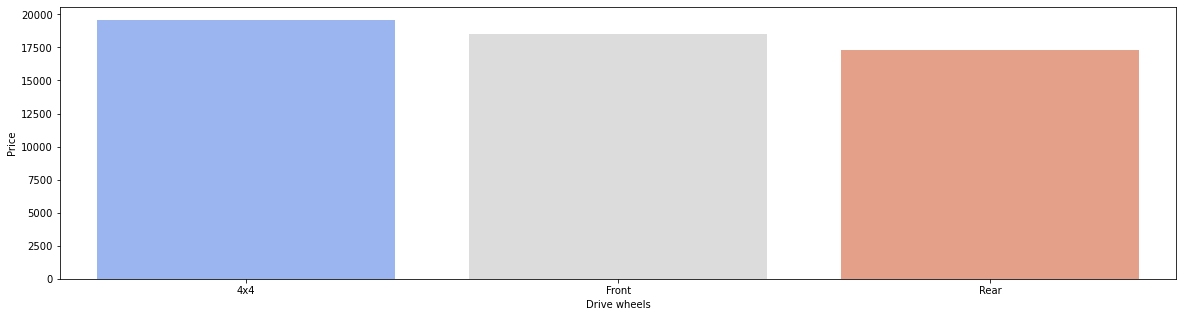

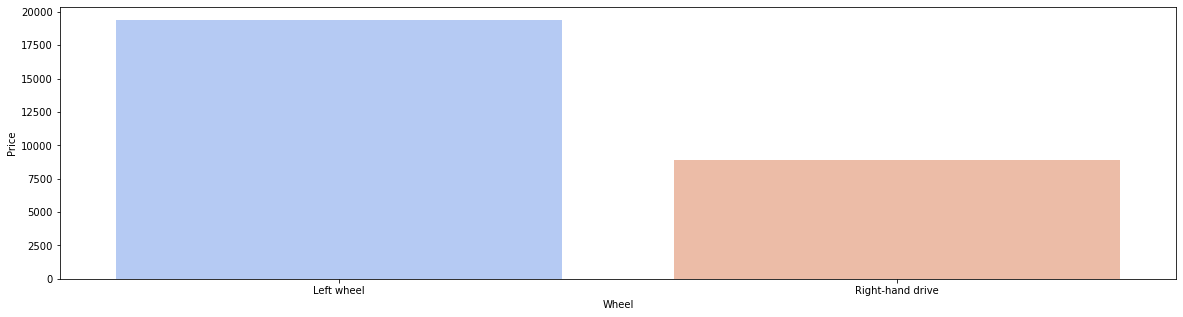

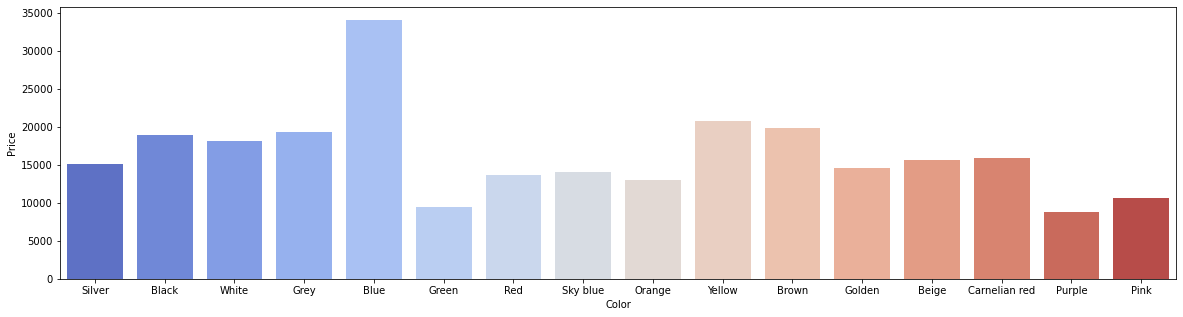

In [30]:
for feature in cat_feature1:
    plt.figure(figsize = (20, 5))
    sns.barplot(x=df[feature],y=df['Price'],ci=None,palette='coolwarm')
    plt.show()

In [31]:
'Category', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color', 'Car Model'

('Category',
 'Fuel type',
 'Gear box type',
 'Drive wheels',
 'Wheel',
 'Color',
 'Car Model')

Category:
   - Even though the the most commonly used vehicly type is the sedan, the more expensive vechilcle type is the Goods wagon. Sedans are supposed to be generally cheaper and more affordable for people to buy.
   
Fuel type:
   - Disel is the most expensive fuel type, but the second highest is the plug-in Hybrid. Third most expensive fuel type is hydrogen and then petrol is fourth.
   
Gear box type:
   - Tiptronic and Manual are priced the same at 25000 where as the Automatic and Variator are cheaper priced equally at 15000.
   
Drive wheels:
   - looking at the graph you can see 4x4 type is the more expensive option with front wheel drive the second most. Rear wheel drive is the cheapest option.
   
Wheel:
   - Left hand drive vehicles are the most common vehicles use in the data set hence why the overall price is higher than right hand drive vehicles. There isnt many data values for right hand drive vehiicles.
   
Color:
   - The most expensive car according to color is Blue, which is suprising as the most commonly used cars in this data set are either black, white or grey not blue at all.
   


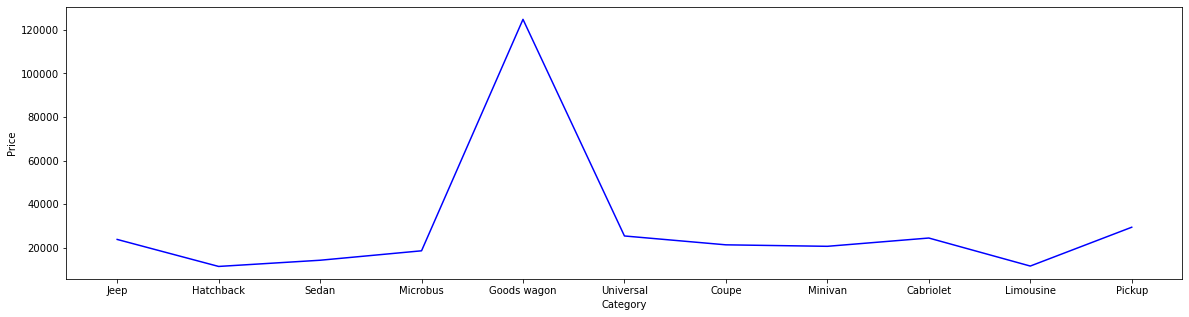

In [32]:
plt.figure(figsize = (20, 5))
sns.lineplot(x=df['Category'],y=df['Price'],ci=None,palette='pastel',color='Blue')
plt.show()

Observation: A line plot graph. This is much better way to see that Goods wagon is the most expensive vehicle type.

# Numerical Features

In [33]:
num_feature=[feature for feature in df.columns if df[feature].dtype =='int64']
print(num_feature)

['Price', 'Prod. year', 'Leather interior', 'Airbags', 'Age']


<AxesSubplot:xlabel='Prod. year', ylabel='Density'>

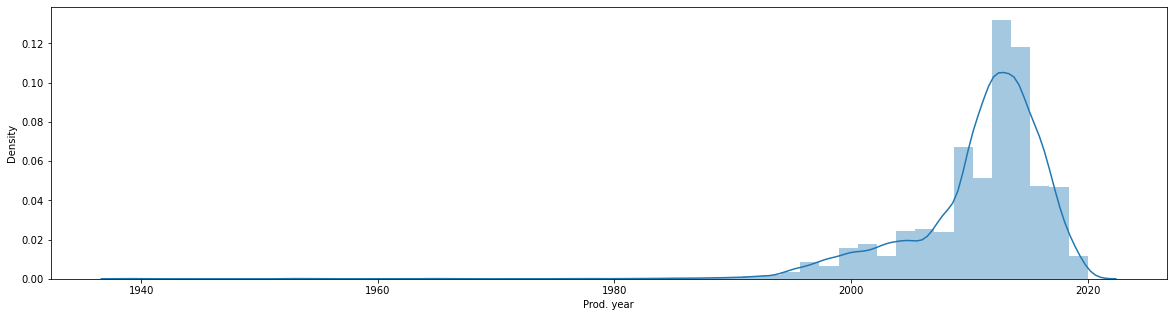

In [34]:
plt.figure(figsize = (20, 5))
sns.distplot(df['Prod. year'], kde=True)

gradual increase in production from early 2000's and peaked at around 2014. This production year of these vechicles range from 1939-2020 however most of the vechiles listed were produced at around 2014-2015 so the price of these vehicles are still relevant considering their age.

<AxesSubplot:xlabel='Age', ylabel='Density'>

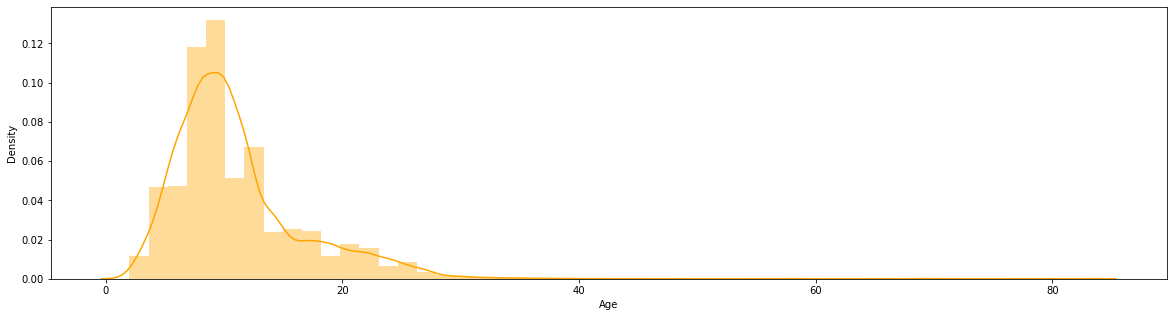

In [35]:
plt.figure(figsize = (20, 5))
sns.distplot(df['Age'], kde=True, color='orange')

<AxesSubplot:xlabel='Price', ylabel='Density'>

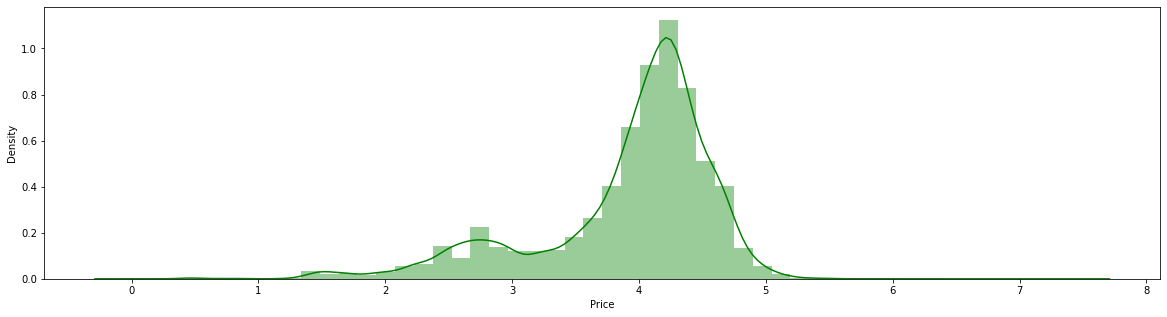

In [36]:
plt.figure(figsize = (20, 5))
sns.distplot(np.log10(df["Price"]), kde=True, color='green')

Variable 'Price' has a right skewneess

<AxesSubplot:xlabel='Airbags', ylabel='count'>

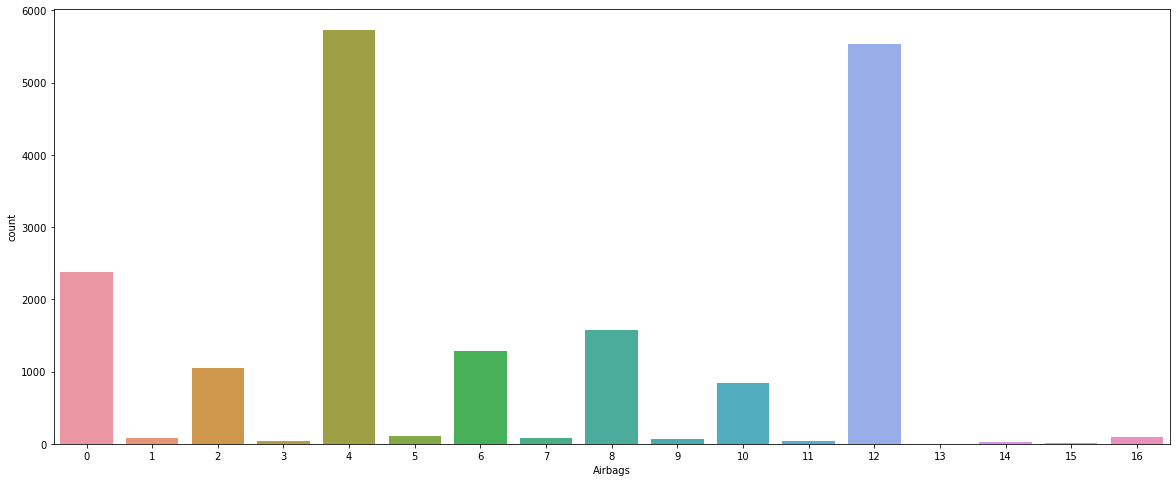

In [37]:
plt.figure(figsize=(20,8))
sns.countplot(df.Airbags)

most of the vehicles have either 4 airbags or 12 airbags

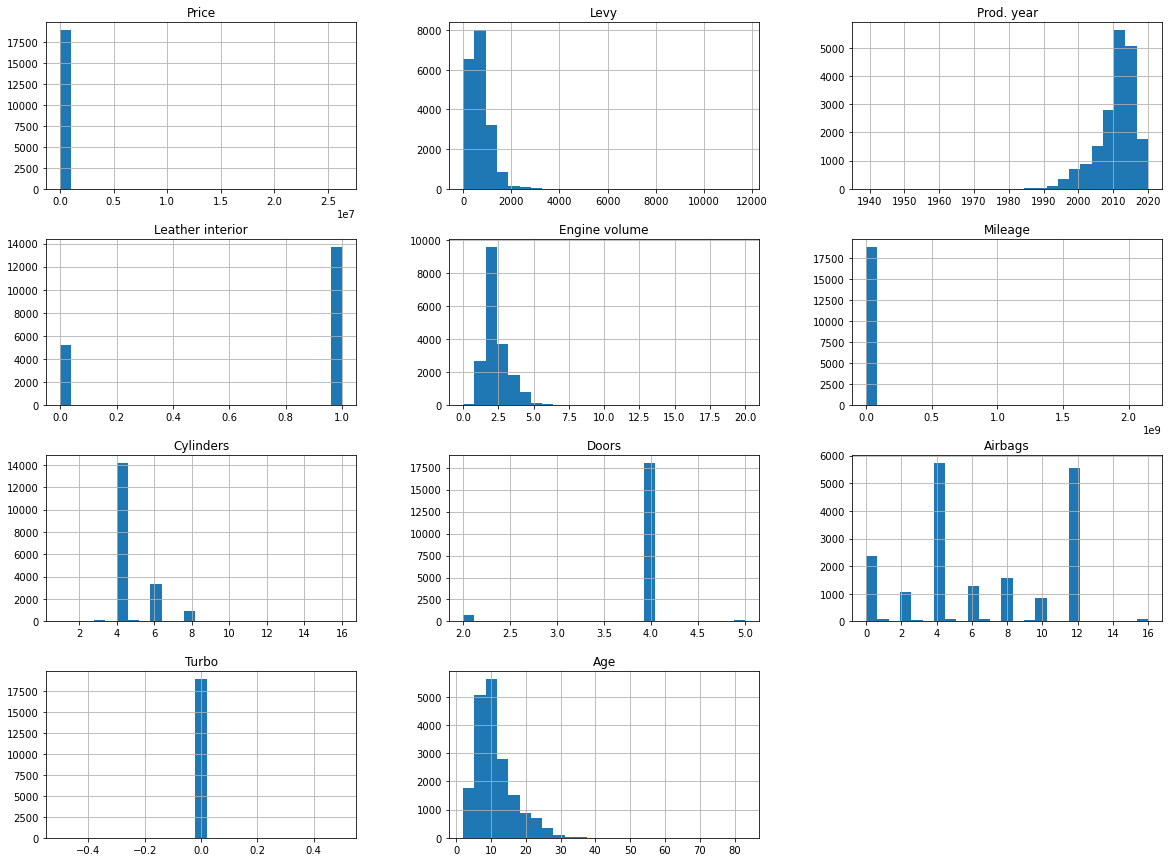

In [38]:
df.hist(bins=25, figsize=(20,15))
plt.show()

<AxesSubplot:>

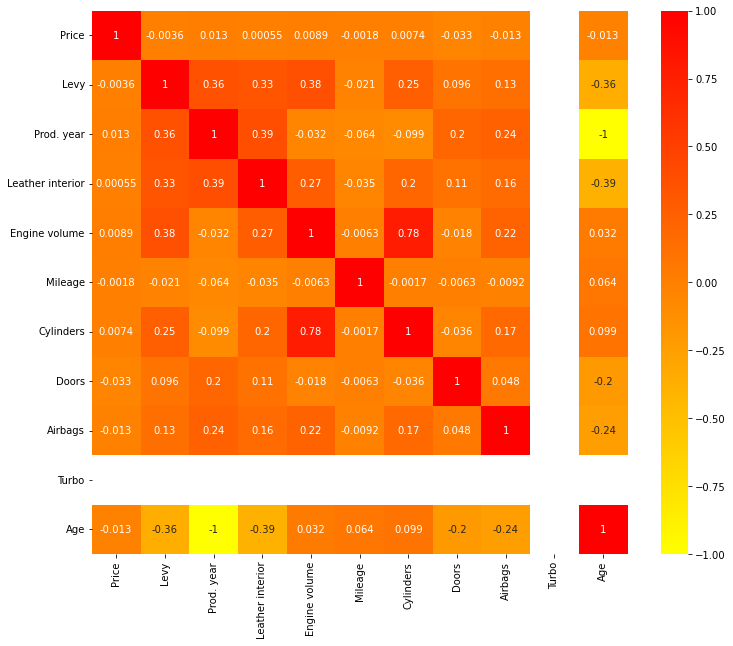

In [39]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='autumn_r')

In [40]:
print('The minimum price is: ', df['Price'].min())
print('The maximum price is: ', df['Price'].max())
print('The average price is: ', df['Price'].mean())

The minimum price is:  1
The maximum price is:  26307500
The average price is:  18587.435267385332


There seem to be values that are non sensible, this requires further attention

In [41]:
df[df.Price == df.Price.max()]

,Price,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Car Model,Turbo,Age
16983,26307500,0,1999,Goods wagon,0,Diesel,1.7,99999,4.0,Manual,Front,2,Left wheel,Blue,0,OPEL Combo,0,23


In [42]:
df[df.Price < 1000]

,Price,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Car Model,Turbo,Age
7,549,751,2013,Sedan,1,Petrol,2.4,216118,4.0,Automatic,Front,4,Left wheel,Grey,12,HYUNDAI Sonata,0,9
10,941,1053,2014,Sedan,1,Diesel,3.5,184467,6.0,Automatic,Rear,4,Left wheel,White,12,MERCEDES-BENZ E 350,0,8
15,549,1079,2018,Jeep,1,Petrol,2.0,74146,4.0,Automatic,Front,4,Left wheel,White,12,TOYOTA CHR,0,4
18,549,2386,2006,Sedan,1,Petrol,3.3,295059,6.0,Automatic,Rear,4,Left wheel,Blue,12,HYUNDAI Sonata,0,16
19,941,1850,2008,Jeep,1,Hybrid,3.5,364523,6.0,Automatic,4x4,4,Left wheel,Black,12,LEXUS RX 400,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19218,30,0,2006,Hatchback,0,Petrol,1.3,0,4.0,Automatic,Front,4,Right-hand drive,Green,9,NISSAN Note,0,16
19228,706,1850,2008,Sedan,1,Diesel,3.5,122874,6.0,Automatic,Rear,4,Left wheel,Black,12,MERCEDES-BENZ E 350,0,14
19229,50,0,2008,Hatchback,0,Hybrid,1.5,150000,4.0,Automatic,Front,4,Left wheel,Silver,6,TOYOTA Prius,0,14
19230,470,645,2011,Hatchback,1,Hybrid,1.8,307325,4.0,Automatic,Front,4,Left wheel,Silver,12,TOYOTA Prius,0,11
